In [ ]:
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
!pip install ekphrasis
!pip install tweet-preprocessor
import preprocessor as p

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 6.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Adding data as a dataframe from a csv file.


In [ ]:
tweets = pd.read_csv("/content/drive/MyDrive/NLP RES DATASET/labeled_dataHSOL.csv")

In [ ]:
tweets.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:
tweetsdf = tweets.dropna()

In [ ]:
tweetsdf['text'] = tweetsdf['tweet']
tweetsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
 7   text                24783 non-null  object
dtypes: int64(6), object(2)
memory usage: 1.5+ MB


In [ ]:
tweetsdf['hashtag'] = tweetsdf['text'].apply(lambda x: re.findall(r"#(\w+)", x))

In [ ]:
tweetsdf.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,text,hashtag
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT @mayasolovely: As a woman you shouldn't...,[]
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,[]
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,[]
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,[]
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,[57361]


Text cleaning -> removing urls/mentions using tweet preprocessor

In [ ]:
#forming a separate feature for cleaned tweets
for i,v in enumerate(tweetsdf['text']):
  tweetsdf.loc[i,'text'] = p.clean(v)

Tokenization , Removal of Digits, Stop Words and Punctuations

In [ ]:
def preprocess_data(data):
 #Removes Numbers
 data = data.astype(str).str.replace('\d+', '')
 lower_text = data.str.lower()
 lemmatizer = nltk.stem.WordNetLemmatizer()
 w_tokenizer =  TweetTokenizer()

 def lemmatize_text(text):
  return [(lemmatizer.lemmatize(w)) for w \
                       in w_tokenizer.tokenize((text))]
 def remove_punctuation(words):
  new_words = []
  for word in words:
      new_word = re.sub(r'[^\w\s]', '', (word))
      if new_word != '':
         new_words.append(new_word)
  return new_words
 words = lower_text.apply(lemmatize_text)
 words = words.apply(remove_punctuation)
 return pd.DataFrame(words)

In [ ]:
pre_tweets = preprocess_data(tweetsdf['text'])
tweetsdf['text'] = pre_tweets
stop_words = set(stopwords.words('english'))
tweetsdf['text'] = tweetsdf['text'].apply(lambda x: [item for item in x if item not in stop_words])

<ipython-input-16-35285b87f56c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data = data.astype(str).str.replace('\d+', '')


In [ ]:
#tweetsdf = tweetsdf.dropna()

In [ ]:
#tweetsdf

In [ ]:
from ekphrasis.classes.segmenter import Segmenter
# segmenter using the word statistics from Twitter
print(type(tweetsdf['hashtag'][3]))
seg_tw = Segmenter(corpus="twitter")
a = []
for i in range(640):
 if (tweetsdf['hashtag'][i] != a):
  listToStr1 = ' '.join([str(elem) for elem in tweetsdf['hashtag'][i]])
  print(listToStr1)
  tweetsdf.loc[i,'Segmented'] = seg_tw.segment(listToStr1)


<class 'list'>
Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt


/usr/local/lib/python3.9/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


57361
128514 128514 128514
8220 8221
128514 128514 128514
128514
128524
128524
128524
Shots
2MW SevenOne
128517 HappyHumpDay
128517 8220 128591 8221
128514 128514 128514 128514 128514 128514 128514 128514 128514 128514 128514
128514 128514 128514 128514 128514 128514 128514 128514 128514 128514
128514 128514 128514 128514 128514 128514 128514
8217 8217
128553 128553 128553 128553
128584
ahmesehwetness
Eaglesnation Eagles
128514 128514 128514 128514
128175 128175 128175 128553 128553 128553
EarlyChristmas
128591
128175
StopWhitePeople2014 128049 8221 128533
CowboysNation
128554 128527 128056
TehGodClan
Yankees
8221
128514
128544 128545 FreeMoneyMelle
128514 128514 128514 128514
8220 8221
128564 128075
128553 128564 9995 128514 128514 128514
128563 128586
128514 128514
128514 128514 128514 128514
oomf
scally chav sockfetish stinking
128530
8217
fixed
KingOfTheHill
128079 128524
UCFPINKPARTY ComeAtMeUT
128514 128079 128514 128079 128514
128557 128514
128533
8220 8221
128525 127807 128064 

In [ ]:
tweetsdf.Segmented.head(5)

0       NaN
1       NaN
2       NaN
3       NaN
4     57361
Name: Segmented, dtype: object

<class 'pandas.core.series.Series'>


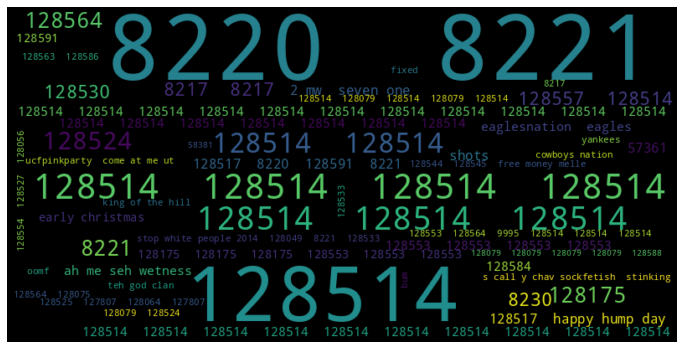

In [ ]:
#Frequency of words
print(type(tweetsdf.Segmented))
fdist = FreqDist(tweetsdf['Segmented'].dropna())
#WordCloud
#for elems in fdist:
 # print(elems)
wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
